# Room-Occupancy Classification

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../datatest.csv')

In [3]:
signal = df['HumidityRatio'].values[:-2000]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


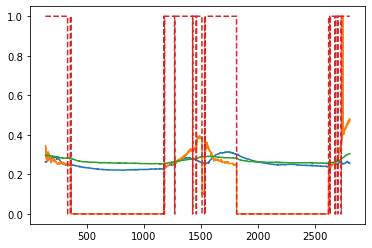

In [9]:
fig, ax = plt.subplots()
ax.plot(df['Humidity']/100)
light = df['Light']/np.max(df['Light'])
ax.plot(light)
ax.plot(df['Temperature']/80)
# ax.plot(df['HumidityRatio']*40)
ax.plot(df['Occupancy'], ls='--')
plt.show(fig)

In [10]:
occupancy = df.Occupancy.values
humidity = df.Humidity.values
light = df.Light.values

(array([0.45353836, 0.07583515, 0.19437358, 0.28346148, 0.08540657,
        0.04564834, 0.03092307, 0.03534065, 0.02282417, 0.01914285]),
 array([22.1    , 22.90225, 23.7045 , 24.50675, 25.309  , 26.11125,
        26.9135 , 27.71575, 28.518  , 29.32025, 30.1225 ]),
 <BarContainer object of 10 artists>)

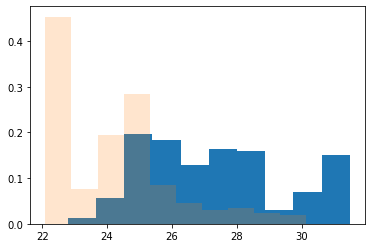

In [11]:
plt.hist(humidity[occupancy == 1], density=True)
plt.hist(humidity[occupancy == 0], alpha=0.2, density=True)

In [12]:
from scipy.stats import gaussian_kde as kde

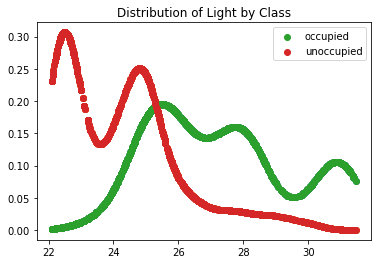

In [38]:
n = len(df) // 2
i = np.arange(len(df))
np.random.shuffle(i)
i = i[:n]
h = humidity[i]
o = occupancy[i]
k1 = kde(h[o == 1])
k0 = kde(h[o == 0])
plt.scatter(humidity, k1.pdf(humidity))
plt.scatter(humidity, k0.pdf(humidity))
plt.scatter(humidity, k1.pdf(humidity), label="occupied")
plt.scatter(humidity, k0.pdf(humidity), label="unoccupied")
plt.title("Distribution of Light by Class")
plt.legend()
plt.show()

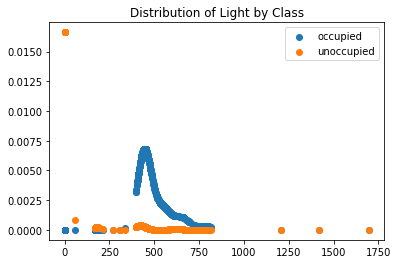

In [39]:
n = len(df) // 2
i = np.arange(len(df))
np.random.shuffle(i)
i = i[:n]
l = light[i]
o = occupancy[i]
k1 = kde(l[o == 1])
k0 = kde(l[o == 0])
plt.scatter(light, k1.pdf(light), label="occupied")
plt.scatter(light, k0.pdf(light), label="unoccupied")
plt.title("Distribution of Light by Class")
plt.legend()
plt.show()


In [15]:
humidity[np.argmin(np.abs(k0.pdf(humidity) - k1.pdf(humidity)))]

31.4725

In [18]:
# test a threshold-based classifier based on light
light_feature = (light > 0.25)*1
occupancy = df.Occupancy.values

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confuse = confusion_matrix(light_feature, occupancy)

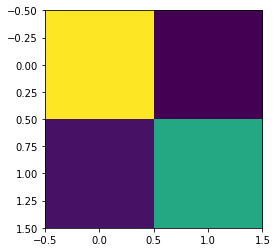

In [21]:
plt.imshow(confuse)

In [22]:
confuse/len(occupancy)

array([[0.60600375, 0.        ],
       [0.02926829, 0.36472795]])

In [23]:
len(df)//20

133

In [25]:
n = len(df)*6//10
occupancy = df.Occupancy.values[0:n]
errors = []
thresholds = np.linspace(0, 1, 100)
for thresh in thresholds:
    light_feature = (light[0:n] > thresh)*1
    humidity_feature = (humidity[0:n] > 25.37)*1
#     feature = ((light_feature + humidity_feature) == 2)*1
    light_feature = (light[0:n] > 0.2)*1
    feature = (light_feature + 0.7*humidity_feature > 2*thresh)*1
    confuse = confusion_matrix(feature, occupancy)/n
#     det = np.linalg.det(confuse/np.linalg.norm(confuse))
    errors.append(confuse[0,0] + confuse[1,1] - confuse[0,1] - confuse[1,1])
#     errors = confuse[0,0]
del confuse, thresh

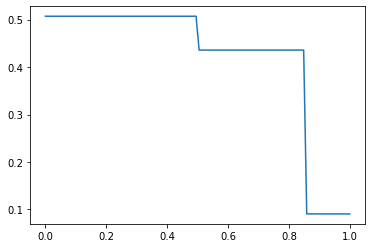

In [26]:
plt.plot(thresholds, errors)

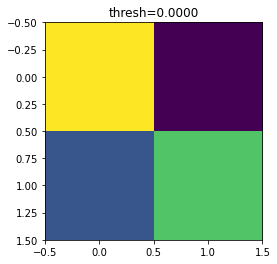

[[0.50093809 0.        ]
 [0.13433396 0.36472795]]


In [28]:
occupancy = df.Occupancy.values
thresh = thresholds[np.argmax(errors)]
# light_feature = (light.values > thresh)*1
# feature = light_feature
light_feature = (light > 0.1182)*1
humidity_feature = (humidity > 25.37)*1
feature = (light_feature + 0.5*humidity_feature > 2*thresh)*1
confuse = confusion_matrix(feature, occupancy)/len(occupancy)
plt.imshow(confuse)
plt.title(f"thresh={thresh:.4f}")
plt.show()
print(confuse)

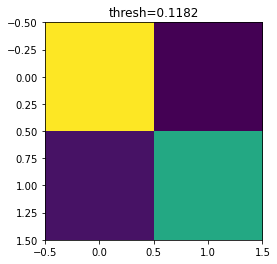

[[0.60600375 0.        ]
 [0.02926829 0.36472795]]


In [30]:
occupancy = df.Occupancy.values
thresh = 0.1182
light_feature = (light > thresh)*1
feature = light_feature
confuse = confusion_matrix(feature, occupancy)/len(occupancy)
plt.imshow(confuse)
plt.title(f"thresh={thresh:.4f}")
plt.show()
print(confuse)

In [31]:
humidity_feature = (humidity > 25.37)*1
occupancy = df.Occupancy.values
confuse = confusion_matrix(humidity_feature, occupancy)/len(occupancy)

In [32]:
confuse

array([[0.51594747, 0.07879925],
       [0.11932458, 0.28592871]])

In [33]:
light_feature + humidity_feature

array([2, 2, 2, ..., 2, 2, 2])